In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading & Reading datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')


# Data Preprocessing

In [3]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Creating customer profiles by aggregating transaction data

In [4]:
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count',  # Number of transactions
}).reset_index()

# Standardizing the data 

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profiles.drop(['CustomerID'], axis=1))

# Clustering using KMeans

In [6]:
cluster_results = {}
db_scores = []


In [7]:
# Testing different cluster sizes
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)
    cluster_results[n_clusters] = {
        'kmeans': kmeans,
        'labels': labels,
        'db_index': db_index
    }


# Determining the best number of clusters (minimum DB index)

In [8]:

best_n_clusters = min(cluster_results, key=lambda x: cluster_results[x]['db_index'])
best_kmeans = cluster_results[best_n_clusters]['kmeans']
best_labels = cluster_results[best_n_clusters]['labels']
best_db_index = cluster_results[best_n_clusters]['db_index']


In [9]:
# Adding cluster labels to the customer profiles
customer_profiles['Cluster'] = best_labels

# Visualization of Clusters

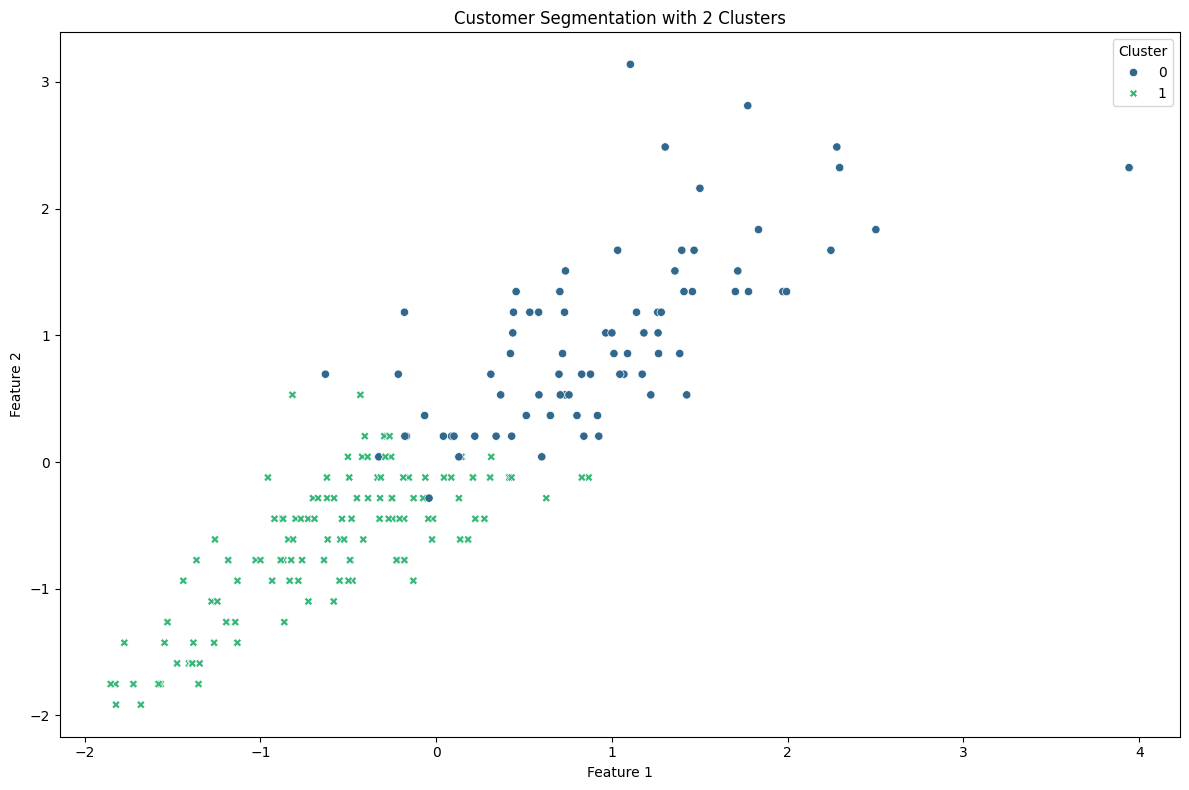

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=best_labels, 
    palette='viridis', 
    style=best_labels
)
plt.title(f'Customer Segmentation with {best_n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('customer_segmentation.png')

# Summary

In [11]:
print(f"Number of clusters: {best_n_clusters}\n")
print(f"Davies-Bouldin Index (Best): {best_db_index:.4f}\n")
print("Cluster Centers:")
for i, center in enumerate(best_kmeans.cluster_centers_):
    print(f"Cluster {i + 1}: {center}")

Number of clusters: 2

Davies-Bouldin Index (Best): 0.7234

Cluster Centers:
Cluster 1: [0.92361919 0.97346455 0.95256717]
Cluster 2: [-0.6080493  -0.64086416 -0.62710672]


# Deliverables

In [12]:

print("Clustering task completed!")
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best DB Index: {best_db_index:.4f}")


Clustering task completed!
Best Number of Clusters: 2
Best DB Index: 0.7234
